In [21]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from wbfm.utils.projects.finished_project_data import ProjectData
fname = "/scratch/zimmer/Charles/dlc_stacks/immobilized-2021_10_25/project_config.yaml"
project_data = ProjectData.load_final_project_data_from_config(fname)

Project data for directory:
/scratch/zimmer/Charles/dlc_stacks/immobilized-2021_10_25 
Found the following raw data files:
red_data: True
green_data: True
============Segmentation===============
raw_segmentation: True
segmentation: False
============Tracklets==================
df_training_tracklets: True
reindexed_masks_training: True
============Traces=====================
red_traces: False
green_traces: False
final_tracks: True
behavior_annotations: False



# Look at final tracks

In [ ]:
df = project_data.final_tracks

In [ ]:
dat = df['neuron_030']
dat.head()

In [ ]:
%matplotlib widget
plt.plot(dat['likelihood'])

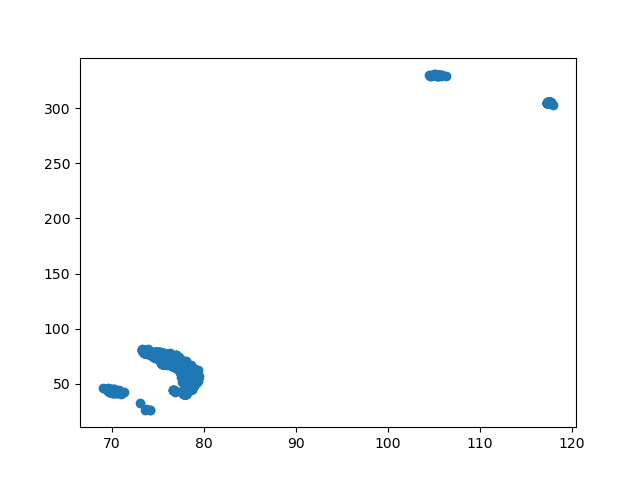

In [16]:
%matplotlib widget
plt.plot(dat['x'], dat['y'], 'o')

# Look at matches on one frame transition

In [17]:
pair = (1984, 1985)
project_data.napari_of_single_match(pair)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(16.0, 66.0, 166.0), zoom=9.809469696969696, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=3, last_used=3, range=((0.0, 1.0, 1.0), (0.0, 32.0, 1.0), (0.0, 132.0, 1.0), (0.0, 332.0, 1.0)), current_step=(0, 0, 0, 0), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'raw_red_data' at 0x7fde60d97110>, <Points layer 'n0_zxy_raw' at 0x7fdeac2ab050>, <Points layer 'n1_zxy_raw' at 0x7fde5edf63d0>, <Tracks layer 'final_matches' at 0x7fde5efd7450>, <Points layer 'Raw IDs' at 0x7fde5e095ad0>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(visi

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/segmentation/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "/home/charles/anaconda3/envs/segmentation/lib/python3.7/site-packages/jupyter_client/threaded.py", line 121, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "/home/charles/anaconda3/envs/segmentation/lib/python3.7/asyncio/base_events.py", line 563, in run_until_complete
    self._check_runnung()
  File "/home/charles/anaconda3/envs/segmentation/lib/python3.7/asyncio/base_events.py", line 526, in _check_runnung
    'Cannot run the event loop while another loop is running')
RuntimeError: Cannot run the event loop while another loop is running
ERROR:tornado.general:Uncaught exception in zmqstream callback
Traceback (most recent call last):
  File "/home/charles/a

In [18]:
m = project_data.raw_matches[pair]

In [21]:
# m.print_reason_for_all_final_matches()

# Look at raw fdnc tracks

In [3]:
df_fdnc = project_data.df_fdnc_tracks

In [99]:
dat = df_fdnc['neuron_014']

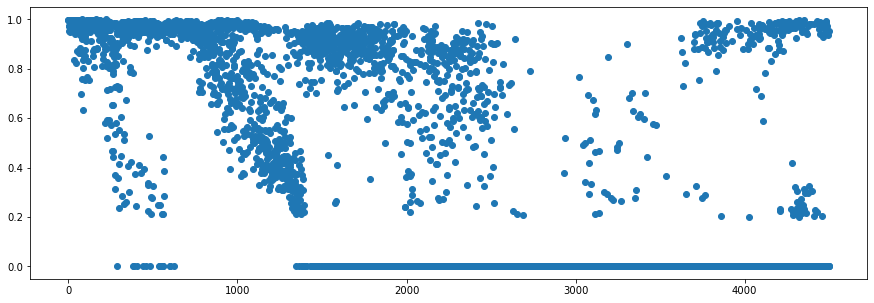

In [100]:
# %matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(dat['likelihood'], 'o')

(array([4.90059471, 0.        , 0.21558172, 0.25114159, 0.2466966 ,
        0.2200267 , 0.25558657, 0.34670874, 0.7712047 , 2.79367236]),
 array([0.        , 0.09998786, 0.19997573, 0.29996359, 0.39995146,
        0.49993932, 0.59992719, 0.69991505, 0.79990292, 0.89989078,
        0.99987864]),
 <a list of 10 Patch objects>)

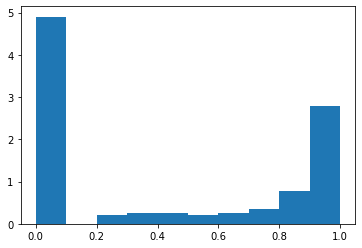

In [101]:
plt.hist(dat['likelihood'], density=True)

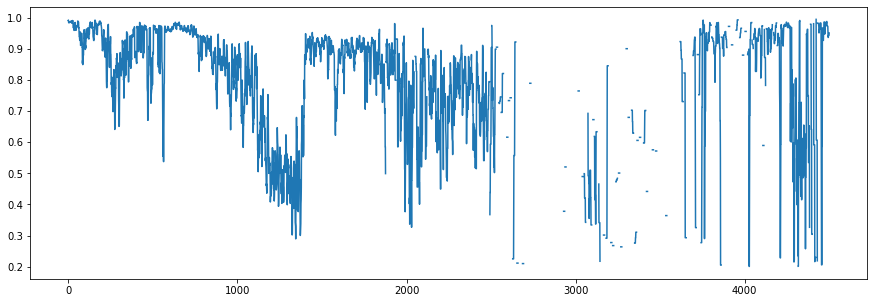

In [102]:
%matplotlib inline
plt.figure(figsize=(15,5))
dat['likelihood'].replace(0.0, np.nan, inplace=True)
plt.plot(dat['likelihood'].rolling(7, min_periods=1, center=True).mean())

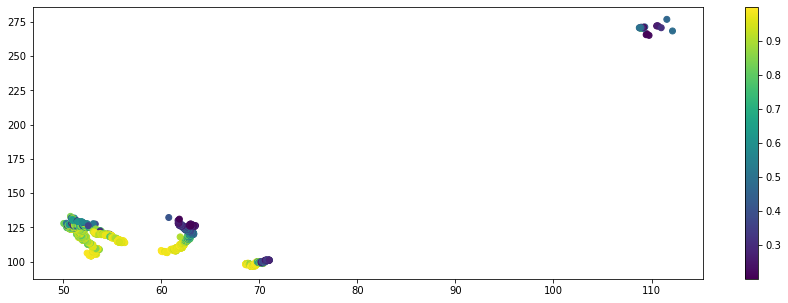

In [103]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.scatter(dat['x'], dat['y'], c=dat['likelihood'])
plt.colorbar()

# Look at tracklets

In [29]:
df_tracklets = project_data.df_all_tracklets

In [35]:
df_tracklets['neuron0'][:10]

coords,z,x,y,likelihood
0,6.080020,69.302966,159.701721,0.912546
1,6.161319,69.226898,159.728756,0.892547
2,6.129887,69.281279,159.751170,0.958359
3,6.132883,69.245238,159.839365,0.918087
4,5.894877,69.396359,160.036186,0.878171
5,6.324737,69.262881,159.862763,0.767576
6,6.076518,69.215286,159.860632,0.947029
7,6.155495,69.270243,159.777132,0.000000
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [68]:
pair = (7,8)

In [36]:
project_data.napari_of_single_match(pair)

Viewer(axes=Axes(visible=False, labels=True, colored=True, dashed=False, arrows=True), camera=Camera(center=(16.0, 66.0, 166.0), zoom=9.809469696969696, angles=(0.0, 0.0, 90.0), perspective=0.0, interactive=True), cursor=Cursor(position=(1.0, 1.0, 0.0, 0.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=4, ndisplay=3, last_used=3, range=((0.0, 1.0, 1.0), (0.0, 32.0, 1.0), (0.0, 132.0, 1.0), (0.0, 332.0, 1.0)), current_step=(0, 0, 0, 0), order=(0, 1, 2, 3), axis_labels=('0', '1', '2', '3')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'raw_red_data' at 0x7fde45926610>, <Points layer 'n0_zxy_raw' at 0x7fde42b83090>, <Points layer 'n1_zxy_raw' at 0x7fde45b64cd0>, <Tracks layer 'final_matches' at 0x7fde3e9e0210>, <Points layer 'Raw IDs' at 0x7fde3e03d650>], scale_bar=ScaleBar(visible=False, colored=False, ticks=True, position=<Position.BOTTOM_RIGHT: 'bottom_right'>, font_size=10.0, unit=None), text_overlay=TextOverlay(visi

ERROR:tornado.general:Uncaught exception in ZMQStream callback
Traceback (most recent call last):
  File "/home/charles/anaconda3/envs/segmentation/lib/python3.7/site-packages/zmq/eventloop/zmqstream.py", line 431, in _run_callback
    callback(*args, **kwargs)
  File "/home/charles/anaconda3/envs/segmentation/lib/python3.7/site-packages/jupyter_client/threaded.py", line 121, in _handle_recv
    msg_list = self.ioloop._asyncio_event_loop.run_until_complete(get_msg(future_msg))
  File "/home/charles/anaconda3/envs/segmentation/lib/python3.7/asyncio/base_events.py", line 563, in run_until_complete
    self._check_runnung()
  File "/home/charles/anaconda3/envs/segmentation/lib/python3.7/asyncio/base_events.py", line 526, in _check_runnung
    'Cannot run the event loop while another loop is running')
RuntimeError: Cannot run the event loop while another loop is running
ERROR:tornado.general:Uncaught exception in zmqstream callback
Traceback (most recent call last):
  File "/home/charles/a

In [69]:
m = project_data.raw_matches[pair]

In [71]:
# m.print_reason_for_match((0,0))

In [22]:
# m.final_matches

# Look at raw matches

In [41]:
raw_clusters = project_data.raw_clust

In [44]:
raw_clusters.iloc[0]

clust_ind                                                        0
all_ind_local                             [0, 0, 0, 0, 0, 0, 0, 0]
all_xyz          [[6.080019528866106, 69.30296594653973, 159.70...
all_prob         [[0.912546141370372], [0.8925467658557634], [0...
slice_ind                                 [0, 1, 2, 3, 4, 5, 6, 7]
Name: 0, dtype: object

# Detail: why are these tracklets so short??

In [54]:

from wbfm.utils.feature_detection.feature_pipeline import track_neurons_full_video
from wbfm.utils.feature_detection.utils_tracklets import build_tracklets_dfs
from wbfm.utils.projects.utils_filepaths import ModularProjectConfig, SubfolderConfigFile, \
    pickle_load_binary
from wbfm.utils.projects.utils_project import safe_cd
from wbfm.utils.training_data.tracklet_to_DLC import convert_training_dataframe_to_dlc_format
import logging
from tqdm.auto import tqdm

In [55]:
all_frame_dict = project_data.raw_frames
all_frame_pairs = project_data.raw_matches
verbose = 1

In [57]:

opt = dict(z_threshold=3.5, min_confidence=0.4)
# all_matches_list = {k: pair.calc_final_matches_using_bipartite_matching(**opt)
#                     for k, pair in tqdm(all_frame_pairs.items())}
all_matches_list = {k: pair.final_matches for k, pair in tqdm(all_frame_pairs.items())}
logging.info("Extracting locations of neurons")
all_zxy = {k: f.neuron_locs for k, f in all_frame_dict.items()}
logging.info("Building tracklets")
# df = build_tracklets_dfs(all_matches_list, all_zxy, verbose=verbose)

  0%|          | 0/4499 [00:00<?, ?it/s]

In [3]:
i = 7
# all_matches_list[(i, i+1)]

# Look at global2tracklet match

In [19]:
from wbfm.utils.feature_detection.utils_tracklets import fix_global2tracklet_full_dict

In [14]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")
len(project_data.global2tracklet)

DEBUG:root:test


127

In [25]:
g2t =  project_data.global2tracklet

g2t['neuron_001']

[3523, 3017, 1902, 3387, 3230]

In [27]:
my_list = g2t['neuron_001']
type(my_list[0])

numpy.int64

In [29]:
# fix_global2tracklet_full_dict(project_data.df_all_tracklets, project_data.global2tracklet)

# Return to imputation, where only tracklets remain

In [35]:
fname = "/scratch/zimmer/Charles/dlc_stacks/immobilized-2021_10_25/3-tracking/postprocessing/combined_3d_tracks.h5"
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_hdf(fname)

In [33]:
df.replace(0.0, np.nan, inplace=True)

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


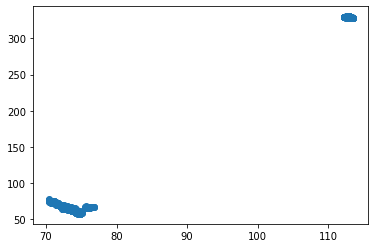

In [59]:
name = 'neuron_001'
plt.plot(df[name]['x'], df[name]['y'], 'o')

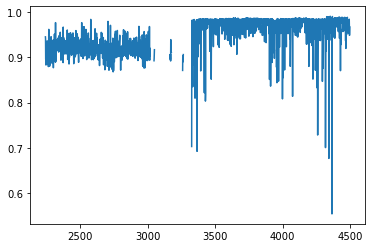

In [60]:

plt.plot(df[name]['likelihood'])

In [76]:
from wbfm.utils.postprocessing.utils_imputation import scale_impute_descale
from wbfm.utils.postprocessing.utils_imputation import df_of_only_locations
from wbfm.utils.postprocessing.postprocessing_utils import filter_dataframe_using_likelihood
from wbfm.utils.postprocessing.utils_imputation import update_dataframe_using_flat_names

In [75]:

df_filtered = filter_dataframe_using_likelihood(df.copy(), 0.4)
df_only_locations, old2new_names = df_of_only_locations(df_filtered)

# Impute and update
df_imputed = scale_impute_descale(df_only_locations, n_nearest_features=100)

  0%|          | 0/127 [00:00<?, ?it/s]

INFO:root:Some columns are all nan, and are dropped: Index(['neuron_006_z', 'neuron_006_x', 'neuron_006_y', 'neuron_007_z',
       'neuron_007_x', 'neuron_007_y', 'neuron_033_z', 'neuron_033_x',
       'neuron_033_y', 'neuron_093_z', 'neuron_093_x', 'neuron_093_y',
       'neuron_107_z', 'neuron_107_x', 'neuron_107_y', 'neuron_127_z',
       'neuron_127_x', 'neuron_127_y'],
      dtype='object')


[IterativeImputer] Completing matrix with shape (4500, 363)
[IterativeImputer] Change: 810.9092388611508, scaled tolerance: 0.030236072621547153 
[IterativeImputer] Change: 923.0336046327928, scaled tolerance: 0.030236072621547153 
[IterativeImputer] Change: 847.3820957576049, scaled tolerance: 0.030236072621547153 
[IterativeImputer] Change: 774.7969653284063, scaled tolerance: 0.030236072621547153 
[IterativeImputer] Change: 800.014336481483, scaled tolerance: 0.030236072621547153 
[IterativeImputer] Change: 818.1730801144946, scaled tolerance: 0.030236072621547153 
[IterativeImputer] Change: 817.8324034695023, scaled tolerance: 0.030236072621547153 
[IterativeImputer] Change: 667.4938910769645, scaled tolerance: 0.030236072621547153 
[IterativeImputer] Change: 701.0676914683875, scaled tolerance: 0.030236072621547153 
[IterativeImputer] Change: 901.645459033163, scaled tolerance: 0.030236072621547153 


/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


NameError: name 'update_dataframe_using_flat_names' is not defined

In [78]:

df_final = update_dataframe_using_flat_names(df, df_imputed, old2new_names)

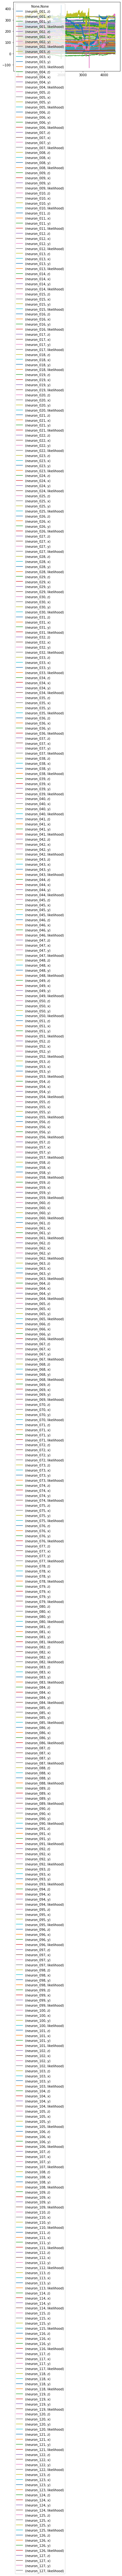

In [81]:
df_final.plot()

In [74]:
df_only_locations.columns[df_only_locations.count() == 0]

Index(['neuron_006_z', 'neuron_006_x', 'neuron_006_y', 'neuron_007_z',
       'neuron_007_x', 'neuron_007_y', 'neuron_033_z', 'neuron_033_x',
       'neuron_033_y', 'neuron_093_z', 'neuron_093_x', 'neuron_093_y',
       'neuron_107_z', 'neuron_107_x', 'neuron_107_y', 'neuron_127_z',
       'neuron_127_x', 'neuron_127_y'],
      dtype='object')